### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download at least 2 weeks worth of [MTA turnstile data](http://web.mta.info/developers/turnstile.html) (You can do this manually or via Python)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }

*Store all the weeks in a data structure of your choosing*

In [2]:
import csv
import os

**Field Description**

* C/A      = Control Area (A002)
* UNIT     = Remote Unit for a station (R051)
* SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
* STATION  = Represents the station name the device is located at
* LINENAME = Represents all train lines that can be boarded at this station. Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
* DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
* DATE     = Represents the date (MM-DD-YY)
* TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
* DESC     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
    1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
    2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
* ENTRIES  = The comulative entry register value for a device
* EXIST    = The cumulative exit register value for a device

In [3]:
turnstile = {}

# looping through all files in data dir starting with MTA_Turnstile
for filename in os.listdir('data'):
    if filename.startswith('MTA_Turnstile'): 
        # reading file and writing each row in a dict
        with open(os.path.join('data', filename), newline='') as csvfile:
            mtareader = csv.reader(csvfile, delimiter=',')
            next(mtareader)
            for row in mtareader:
                key = (row[0], row[1], row[2], row[3])
                value = [row[4], row[5], row[6], row[7], row[8], row[9], row[10].rstrip()]
                if key in turnstile:
                    turnstile[key].append(value)
                else:
                    turnstile[key] = [value]

In [4]:
# test value for dict
test = ('A002','R051','02-00-00','59 ST')

In [5]:
turnstile[test]#[:2]

[['NQR456W',
  'BMT',
  '08/12/2017',
  '00:00:00',
  'REGULAR',
  '0006287419',
  '0002130235'],
 ['NQR456W',
  'BMT',
  '08/12/2017',
  '04:00:00',
  'REGULAR',
  '0006287451',
  '0002130238'],
 ['NQR456W',
  'BMT',
  '08/12/2017',
  '08:00:00',
  'REGULAR',
  '0006287469',
  '0002130269'],
 ['NQR456W',
  'BMT',
  '08/12/2017',
  '12:00:00',
  'REGULAR',
  '0006287551',
  '0002130364'],
 ['NQR456W',
  'BMT',
  '08/12/2017',
  '16:00:00',
  'REGULAR',
  '0006287762',
  '0002130410'],
 ['NQR456W',
  'BMT',
  '08/12/2017',
  '20:00:00',
  'REGULAR',
  '0006287984',
  '0002130445'],
 ['NQR456W',
  'BMT',
  '08/13/2017',
  '00:00:00',
  'REGULAR',
  '0006288108',
  '0002130468'],
 ['NQR456W',
  'BMT',
  '08/13/2017',
  '04:00:00',
  'REGULAR',
  '0006288126',
  '0002130468'],
 ['NQR456W',
  'BMT',
  '08/13/2017',
  '08:00:00',
  'REGULAR',
  '0006288143',
  '0002130485'],
 ['NQR456W',
  'BMT',
  '08/13/2017',
  '12:00:00',
  'REGULAR',
  '0006288201',
  '0002130551'],
 ['NQR456W',
  'BMT'

## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [6]:
import numpy as np
import datetime
from dateutil.parser import parse

In [7]:
turnstile_timeseries = {}

# looping through each key in dict, parsing the date and calculating the difference between previous and current count
for key in turnstile:
    prev = np.nan
    value = []
    for el in turnstile[key]:
        value.append([parse(el[2] + ' ' + el[3]), int(el[5]) - prev])
        prev = int(el[5])
    if key in turnstile_timeseries:
        turnstile_timeseries[key].append(value)
    else:
        turnstile_timeseries[key] = value

In [8]:
turnstile_timeseries[test]#[:5]
# ('R305', 'R206', '01-00-00','125 ST')

[[datetime.datetime(2017, 8, 12, 0, 0), nan],
 [datetime.datetime(2017, 8, 12, 4, 0), 32],
 [datetime.datetime(2017, 8, 12, 8, 0), 18],
 [datetime.datetime(2017, 8, 12, 12, 0), 82],
 [datetime.datetime(2017, 8, 12, 16, 0), 211],
 [datetime.datetime(2017, 8, 12, 20, 0), 222],
 [datetime.datetime(2017, 8, 13, 0, 0), 124],
 [datetime.datetime(2017, 8, 13, 4, 0), 18],
 [datetime.datetime(2017, 8, 13, 8, 0), 17],
 [datetime.datetime(2017, 8, 13, 12, 0), 58],
 [datetime.datetime(2017, 8, 13, 16, 0), 129],
 [datetime.datetime(2017, 8, 13, 20, 0), 183],
 [datetime.datetime(2017, 8, 14, 0, 0), 97],
 [datetime.datetime(2017, 8, 14, 4, 0), 14],
 [datetime.datetime(2017, 8, 14, 8, 0), 38],
 [datetime.datetime(2017, 8, 14, 12, 0), 156],
 [datetime.datetime(2017, 8, 14, 16, 0), 261],
 [datetime.datetime(2017, 8, 14, 20, 0), 658],
 [datetime.datetime(2017, 8, 15, 0, 0), 182],
 [datetime.datetime(2017, 8, 15, 4, 0), 22],
 [datetime.datetime(2017, 8, 15, 8, 0), 23],
 [datetime.datetime(2017, 8, 15, 12,

## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [9]:
turnstile_daily = {}

# looping through each key in the timeseries, tracking if the date change while cumulating partial counts
for key in turnstile_timeseries:
    value = []
    prev_date = ''
    daily_entries = 0
    for el in turnstile_timeseries[key]:
        curr_date = el[0].date()
        daily_entries += el[1]
        # if the current date differs from the previous I write the value in the dict and reset the other data
        # I check that the date isn't empty to avoid writing the initial values for each key
        if prev_date != curr_date:
            if prev_date != '':
                value.append([prev_date, daily_entries])
            daily_entries = 0
            prev_date = curr_date
    # I write the last value of the loop in each case, this is the closing value of the period
    value.append([prev_date, daily_entries])
    if key in turnstile_daily:
        turnstile_daily[key].append(value)
    else:
        turnstile_daily[key] = value

In [10]:
turnstile_daily[test]

[[datetime.date(2017, 8, 12), 689],
 [datetime.date(2017, 8, 13), 502],
 [datetime.date(2017, 8, 14), 1309],
 [datetime.date(2017, 8, 15), 1383],
 [datetime.date(2017, 8, 16), 1413],
 [datetime.date(2017, 8, 17), 1429],
 [datetime.date(2017, 8, 18), 1265],
 [datetime.date(2017, 8, 19), 630],
 [datetime.date(2017, 8, 20), 495],
 [datetime.date(2017, 8, 21), 1294],
 [datetime.date(2017, 8, 22), 1187],
 [datetime.date(2017, 8, 23), 1357],
 [datetime.date(2017, 8, 24), 1478],
 [datetime.date(2017, 8, 25), 1157]]

## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

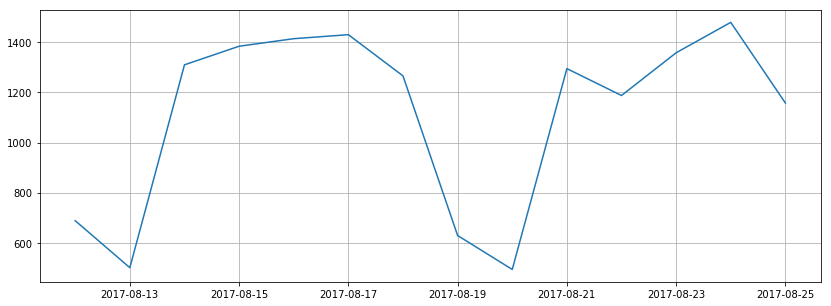

In [12]:
# using list comprehension, there are other ways such as dict.keys() and dict.items()
dates = [el[0] for el in turnstile_daily[test]]
counts = [el[1] for el in turnstile_daily[test]]

fig = plt.figure(figsize=(14, 5))
ax = plt.axes()
ax.plot(dates, counts)
plt.grid('on');

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [68]:
temp = {}

# for each key I form the new key and check if it's already in the new dict
# I append the date in this temp dict to make it easier to sum the values
# then I create a new dict with the required keys
for key in turnstile_daily:
    new_key = list(key[0:2]) + list(key[-1:])
    for el in turnstile_daily[key]:
        # setting single negative values to 0:
        # possible causes:
            # strange things in data such as totals that lessen each hour going forward
        # also setting single values over 10.000.000 to 0 to avoid integer overflow:
        # possible causes:
            # data recovery
        value = np.int64(el[1])
        if value < 0 or value > 10000000:
            value = 0
        if tuple(new_key + [el[0]]) in temp:
            temp[tuple(new_key + [el[0]])] += value
        else:
            temp[tuple(new_key + [el[0]])] = value

In [69]:
ca_unit_station = {}

for key in temp:
    new_key = key[0:3]
    date = key[-1]
    if new_key in ca_unit_station:
        ca_unit_station[new_key].append([date, temp[key]])
    else:
        ca_unit_station[new_key] = [[date, temp[key]]]

In [70]:
ca_unit_station[('R305', 'R206', '125 ST')]

[[datetime.date(2017, 8, 12), 2439],
 [datetime.date(2017, 8, 13), 2010],
 [datetime.date(2017, 8, 14), 3105],
 [datetime.date(2017, 8, 15), 0],
 [datetime.date(2017, 8, 16), 5344],
 [datetime.date(2017, 8, 17), 5422],
 [datetime.date(2017, 8, 18), 4987],
 [datetime.date(2017, 8, 19), 3873],
 [datetime.date(2017, 8, 20), 3148],
 [datetime.date(2017, 8, 21), 4758],
 [datetime.date(2017, 8, 22), 4933],
 [datetime.date(2017, 8, 23), 5013],
 [datetime.date(2017, 8, 24), 5254],
 [datetime.date(2017, 8, 25), 4678]]

## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [71]:
temp = {}

# for each key I form the new key and check if it's already in the new dict
# I append the date in this temp dict to make it easier to sum the values
# then I create a new dict with the required keys
for key in turnstile_daily:
    new_key = key[-1]
    for el in turnstile_daily[key]:
        # setting single negative values to 0:
        # possible causes:
            # strange things in data such as totals that lessen each hour going forward
        # also setting single values over 10.000.000 to 0 to avoid integer overflow:
        # possible causes:
            # data recovery
        value = np.int64(el[1])
        if value < 0 or value > 10000000:
            value = 0
        if (new_key, el[0]) in temp:
            temp[(new_key, el[0])] += value
        else:
            temp[(new_key, el[0])] = value

In [72]:
station = {}

for key in temp:
    new_key = key[0]
    date = key[-1]
    if new_key in station:
        station[new_key].append([date, temp[key]])
    else:
        station[new_key] = [[date, temp[key]]]

In [84]:
station['59 ST']

[[datetime.date(2017, 8, 12), 37121],
 [datetime.date(2017, 8, 13), 29765],
 [datetime.date(2017, 8, 14), 67938],
 [datetime.date(2017, 8, 15), 71742],
 [datetime.date(2017, 8, 16), 72568],
 [datetime.date(2017, 8, 17), 71766],
 [datetime.date(2017, 8, 18), 63868],
 [datetime.date(2017, 8, 19), 41776],
 [datetime.date(2017, 8, 20), 32361],
 [datetime.date(2017, 8, 21), 63113],
 [datetime.date(2017, 8, 22), 67567],
 [datetime.date(2017, 8, 23), 69994],
 [datetime.date(2017, 8, 24), 69327],
 [datetime.date(2017, 8, 25), 59005]]

## Exercise 7
- Plot the time series for a station

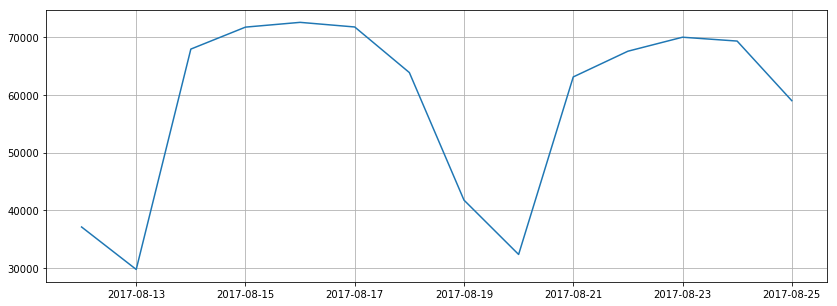

In [76]:
test_station = '59 ST'

dates = [el[0] for el in station[test_station]]
counts = [el[1] for el in station[test_station]]

fig = plt.figure(figsize=(14, 5))
ax = plt.axes()
ax.plot(dates, counts)
plt.grid('on');

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



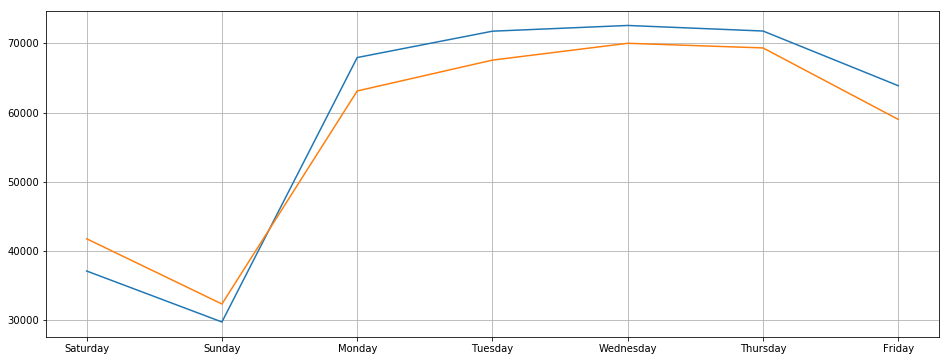

In [77]:
fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
n = len(station[test_station])
# creating a list with all the counts for the station
all_counts = [el[1] for el in station[test_station]]
# splitting counts every 7 values to get weekly data
for i in range(int(np.floor(n/7))):
    ax.plot(all_counts[i*7: 7 + i*7])
ax.set_xticklabels(['', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid('on');

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [78]:
total_ridership = {}

# just looping through keys and summing all elements inside the dict
for key in station:
    for el in station[key]:
        if key in total_ridership:
            total_ridership[key] += el[1]
        else:
            total_ridership[key] = el[1]

In [99]:
import operator
sorted(total_ridership.items(), key=operator.itemgetter(1), reverse=True)

[('34 ST-PENN STA', 1767161),
 ('GRD CNTRL-42 ST', 1604500),
 ('34 ST-HERALD SQ', 1320762),
 ('TIMES SQ-42 ST', 1207986),
 ('14 ST-UNION SQ', 1205867),
 ('23 ST', 1192051),
 ('42 ST-PORT AUTH', 1077606),
 ('FULTON ST', 1065607),
 ('86 ST', 938611),
 ('CANAL ST', 848954),
 ('125 ST', 840526),
 ('59 ST', 817911),
 ('59 ST COLUMBUS', 775840),
 ('FLUSHING-MAIN', 710137),
 ('96 ST', 679140),
 ('47-50 STS ROCK', 652054),
 ('CHAMBERS ST', 629776),
 ('ATL AV-BARCLAY', 626845),
 ('14 ST', 613190),
 ('PATH NEW WTC', 601406),
 ('JKSN HT-ROOSVLT', 600527),
 ('50 ST', 549029),
 ('28 ST', 539319),
 ('72 ST', 513946),
 ('42 ST-BRYANT PK', 487990),
 ('WALL ST', 466430),
 ('W 4 ST-WASH SQ', 465351),
 ('JAY ST-METROTEC', 448077),
 ('8 AV', 441008),
 ('7 AV', 423605),
 ('145 ST', 417455),
 ('CHURCH AV', 413452),
 ('JAMAICA CENTER', 405501),
 ('LEXINGTON AV/53', 401562),
 ('GRAND ST', 385133),
 ('116 ST', 384039),
 ('BOROUGH HALL', 379706),
 ('57 ST-7 AV', 360354),
 ('BEDFORD AV', 358225),
 ('BOWLING GREE

## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

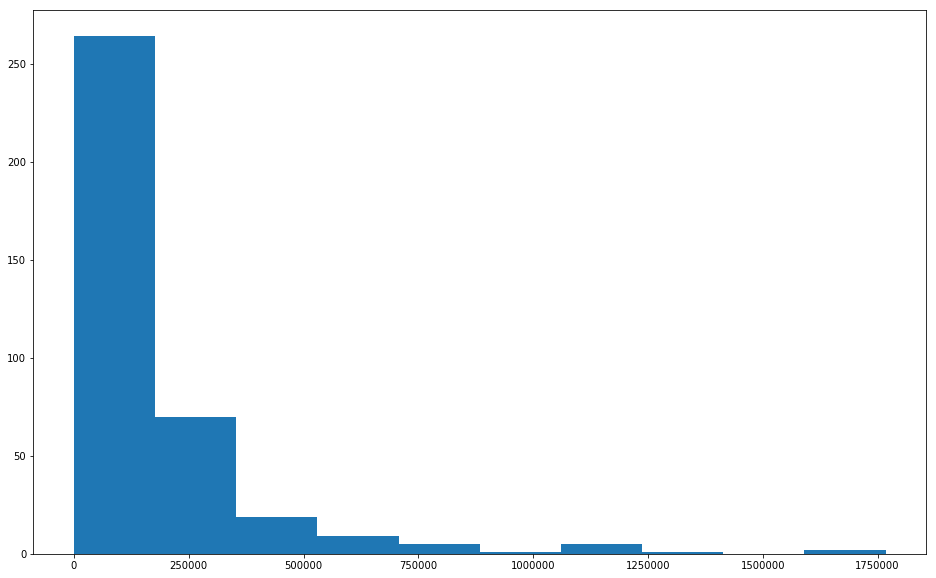

In [105]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
ax.hist(list(total_ridership.values()));

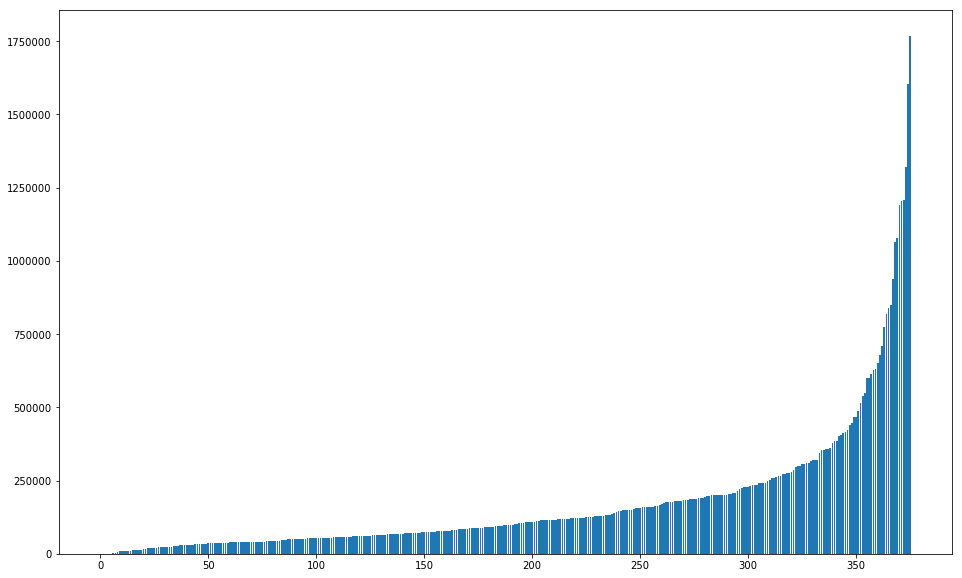

In [108]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
ax.bar(range(len(total_ridership)), sorted(list(total_ridership.values())));